In [1]:
%matplotlib widget
from main import *
import sympy as sp
from sympy import Heaviside, sin, cos
import matplotlib.pyplot as plt

sp.init_printing()

In [2]:
Vcc = 5

var = sp.Symbol("Vin", real=True)

In [3]:
acTest = Solver.Circuit("acTest")
acTest.element(
                    VoltageSource("Vg", {"V+" : "V1", "V-" : Gnd}, V_t = 5 * Heaviside(t-1)),
                    Diode("D1", {"Vp" : "V1", "Vn" : "V2"}),
                    Capacitor("C1", {"V1" : "V2", "V2" : Gnd}, V0 = 0, C = 1e-5),
)

{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*Heaviside(t - 1)}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V2'}, 'values': {'Vd': 0.6, 'T': 300}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'V2', 'V2': 0}, 'values': {'C': 1e-05, 'V0': 0}}}

In [4]:
Solver.setMain("acTest")
compiled = Solver.compile()

In [5]:
model = solveLaplace(compiled, 4, 0.1, debugLog = 2)

{V0, I1_1, I0_1, I2_0, I0_0, I1_0, I2_1, V1}
[Eq(I1_1 + I2_0, 0), Eq(I0_0 + I1_0, 0)]
{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*Heaviside(t - 1)}}, 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V2'}, 'values': {'Vd': 0.6, 'T': 300}}, 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'V2', 'V2': 0}, 'values': {'C': 1e-05, 'V0': 0}}}
{'Vg': {'V+': V1, 'V-': 0}, 'D1': {'Vp': V1, 'Vn': V0}, 'C1': {'V1': V0, 'V2': 0}}
{'Vg': {'V+': I0_0, 'V-': I0_1}, 'D1': {'Vp': I1_0, 'Vn': I1_1}, 'C1': {'V1': I2_0, 'V2': I2_1}}
***************************************
{('Vg', ''), ('D1', 'Cut'), ('C1', '')}
[Eq(V1, 5*exp(-s)/s), Eq(I0_0 + I0_1, 0), Eq(I1_0, 0), Eq(I1_1, 0), Eq(I2_0, 1.0e-5*V0*s), Eq(I2_0 + I2_1, 0), Eq(I1_1 + I2_0, 0), Eq(I0_0 + I1_0, 0)]
{('D1', 'Cut'): [-V0 + V1 <= 0.6]}
{V0, V1}
-------------------------------------------------
{V1: 5.0*exp(-s)/s, I0_0: 0.0, I0_1: 0.0, I1_0: 0.0, I1

In [6]:
print(compiled["nodes"])

Vin = compiled["voltages"]["Vg"]["V+"]
Id = compiled["currents"]["D1"]["Vp"]
Vd = compiled["voltages"]["D1"]["Vp"] - compiled["voltages"]["D1"]["Vn"]
Vc = compiled["nodes"]["V2"]

{'V2': V0, 'V1': V1}


In [7]:
printModel(model, var=t, measurments={Id})
printModel(model, var=t, measurments={Vc})

{('Vg', ''), ('D1', 'Cut'), ('C1', '')}
t ∈ Interval.Ropen(0, 1.00002441406250)
I1_0  : 
0
-------------------------------------
{('Vg', ''), ('D1', 'Fwd'), ('C1', '')}
t ∈ Interval.Ropen(1.00002441406250, 1.00004882812500)
I1_0  : 
11⋅Δ(t)
───────
 250000
-------------------------------------
{('Vg', ''), ('D1', 'Cut'), ('C1', '')}
t ∈ Interval(1.00004882812500, 4.00004882812500)
I1_0  : 
0
-------------------------------------
{('Vg', ''), ('D1', 'Cut'), ('C1', '')}
t ∈ Interval.Ropen(0, 1.00002441406250)
V0  : 
0
-------------------------------------
{('Vg', ''), ('D1', 'Fwd'), ('C1', '')}
t ∈ Interval.Ropen(1.00002441406250, 1.00004882812500)
V0  : 
22⋅U(t)
───────
   5   
-------------------------------------
{('Vg', ''), ('D1', 'Cut'), ('C1', '')}
t ∈ Interval(1.00004882812500, 4.00004882812500)
V0  : 
22⋅U(t)
───────
   5   
-------------------------------------


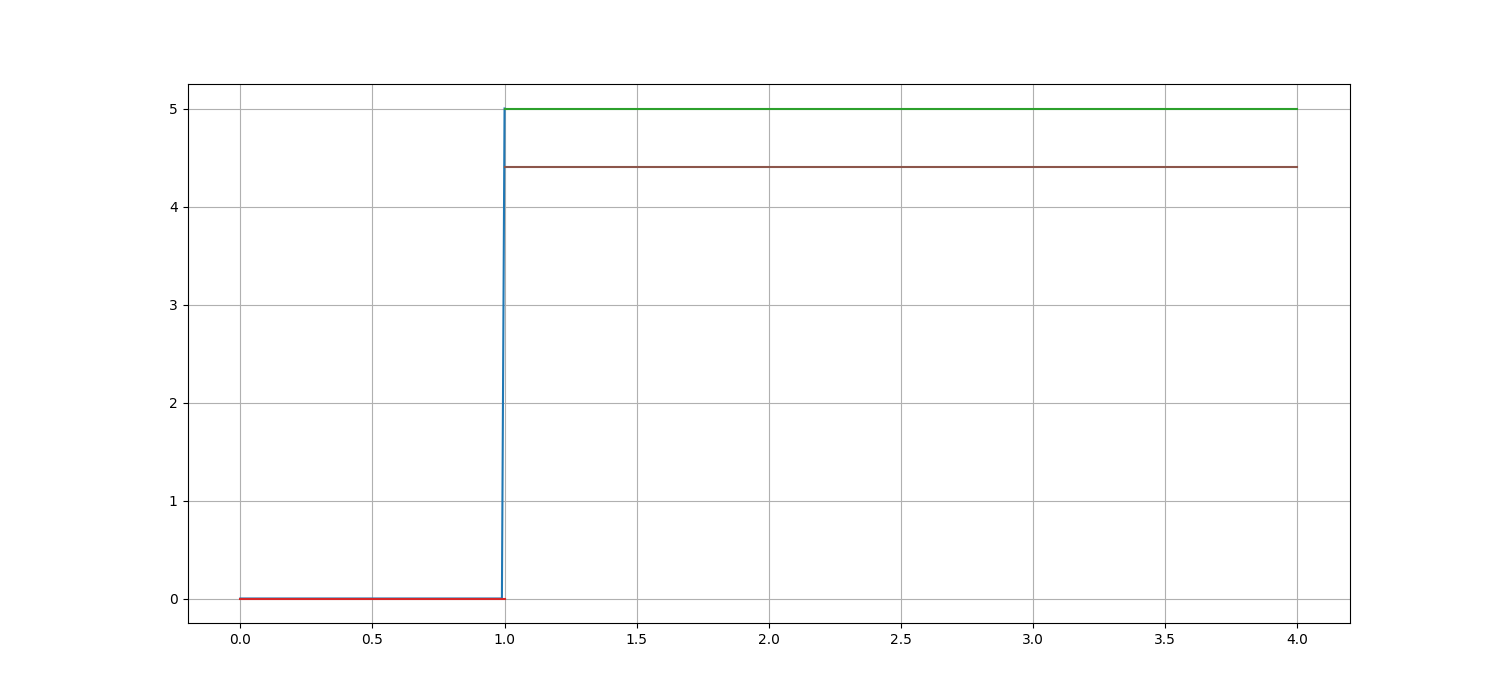

In [8]:
measurments =   [   
                    (t0, Vin, "Vin(t)"),
                    (t0, Vc, "Vc(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()

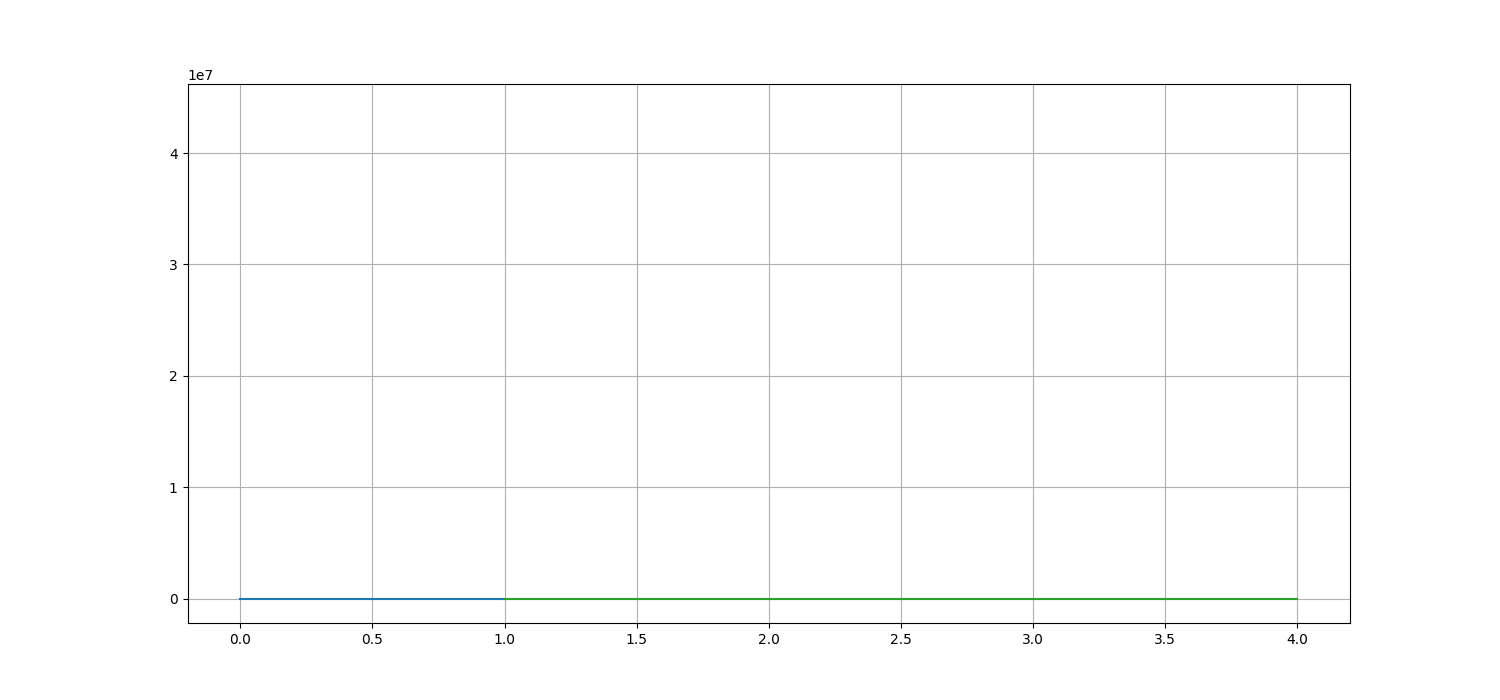

In [9]:
measurments =   [   
                    (t0, Id, "Id(t)"),
                    #(Vd, "Vd(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()